In [6]:
import sys
import os

# Add the parent folder of 'src' to sys.path
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(""), '..', 'src')))


In [7]:
from clusters import clustering, interpret, evaluate, compute_global_centroid
from plots import plot_cluster_divergence

In [8]:
%pip install ir_datasets numpy matplotlib seaborn scikit-learn scipy
%pip install ir_datasets

import ir_datasets
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


k = 10, silhouette score: 0.0099

Cluster 2:
  Medoid Doc ID: 9z3ppxph
  Top Terms: influenza, respiratory, children, viruses, patients, virus, infections, viral, rsv, infection
  Divergent Terms: influenza, respiratory, children, infections, viruses, patients, rsv, h1n1, tract, virus
  KL Divergence from Global: 0.6198

Cluster 1:
  Medoid Doc ID: u2mfjhtj
  Top Terms: disease, patients, virus, human, diseases, infection, clinical, based, viruses, new
  Divergent Terms: la, en, chapter, species, applications, drug, cats, use, bats, compounds
  KL Divergence from Global: 0.1682

Cluster 5:
  Medoid Doc ID: dqour5jr
  Top Terms: sars, cov, coronavirus, syndrome, severe, acute, respiratory, protein, patients, infection
  Divergent Terms: sars, cov, coronavirus, syndrome, severe, acute, respiratory, protein, ace2, spike
  KL Divergence from Global: 0.5660

Cluster 7:
  Medoid Doc ID: lxpwut0w
  Top Terms: rna, protein, virus, viral, proteins, viruses, replication, host, membrane, fusion
 

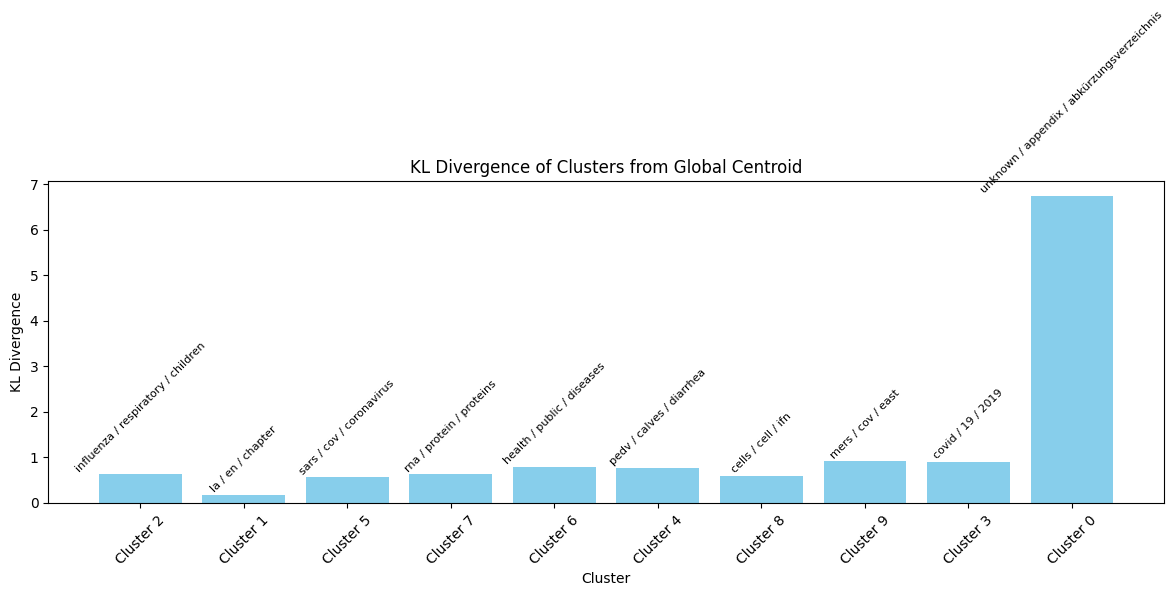

In [10]:
import ir_datasets
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Load dataset
dataset = ir_datasets.load("cord19/trec-covid/round1")

# Step 1: Extract all documents
docs = [(doc.doc_id, f"{doc.title or ''} {doc.abstract or ''}") for doc in dataset.docs_iter() if doc.abstract]
doc_ids, texts = zip(*docs)

# Step 2: Fit ONE vectorizer for everything
vectorizer = TfidfVectorizer(stop_words='english')
X_all = vectorizer.fit_transform(texts)

# Step 3: Compute global centroid
global_centroid = np.asarray(X_all.mean(axis=0)).flatten()

# Step 4: Run clustering using this vectorizer
clusters, _, _ = clustering(ir_datasets.load("cord19/trec-covid/round1").docs_iter())

# Storage for plotting
cluster_labels = []
kl_divergences = []
label_summaries = []

# Step 5: Interpret each cluster and collect info
for cluster in clusters:
    dataset = ir_datasets.load("cord19/trec-covid/round1")
    interpretation = interpret(
        cluster,
        dataset.docs_iter(),
        global_centroid=global_centroid,
        global_vectorizer=vectorizer
    )

    # Collect for plot
    cluster_labels.append(f"Cluster {cluster[0]}")
    kl_divergences.append(interpretation['kl_divergence'])
    label_summary = " / ".join(interpretation['divergent_terms'][:3])
    label_summaries.append(label_summary)

    # Print results
    print(f"\nCluster {cluster[0]}:")
    print(f"  Medoid Doc ID: {interpretation['medoid']}")
    print(f"  Top Terms: {', '.join(interpretation['top_terms'])}")
    print(f"  Divergent Terms: {', '.join(interpretation['divergent_terms'])}")
    print(f"  KL Divergence from Global: {interpretation['kl_divergence']:.4f}")

plot_cluster_divergence(cluster_labels, kl_divergences, label_summaries)
